In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,f1_score

In [2]:
df = pd.read_csv('current_FAO/raw_files/Trade_Crops_Livestock_E_All_Data_(Normalized).csv', encoding = 'ISO-8859-1')
print(df.shape)
df.head()

(14566119, 11)


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN


In [3]:
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14566119 entries, 0 to 14566118
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.2+ GB


In [4]:
df.drop(columns = ['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Flag','Unit'], axis = 1, inplace = True)
df=df.loc[df['Element']=='Import Quantity']
df.rename(columns = {'Value':'Import Quantity(tonnes)'}, inplace = True)
df.drop(columns = ['Element'], axis = 1, inplace = True)
df

,Area,Item,Year,Import Quantity(tonnes)
212,Afghanistan,Apples,1961,0.0
213,Afghanistan,Apples,1962,0.0
214,Afghanistan,Apples,1963,0.0
215,Afghanistan,Apples,1964,0.0
216,Afghanistan,Apples,1965,0.0
...,...,...,...,...
14565955,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2009,270195.0
14565956,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2010,290974.0
14565957,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2011,316618.0
14565958,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2012,349951.0


In [5]:
print(df['Area'].unique())
print(df.shape)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethiopia PDR'
 'Fal

In [6]:
drop_countries = ['USSR','European Union (exc intra-trade)', 'World', 'Saint Kitts and Nevis',
                  'Saint Lucia', 'Saint Pierre and Miquelon', 'Netherlands Antilles (former)',
                  'Saint Vincent and the Grenadines', 'Sudan (former)', 
                  'The former Yugoslav Republic of Macedonia', 'Serbia and Montenegro',
                  'Sao Tome and Principe', 'Seychelles', 'Central Asia',
                  'Belgium-Luxembourg', 'Netherlands Antilles (former)', 'EU(12)ex.int', 'EU(15)ex.int',
                  'EU(25)ex.int', 'EU(27)ex.int', 'European Union (exc intra-trade)', 'World',
                  'Africa', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
                  'Southern Africa', 'Western Africa', 'Americas', 'Northern America',
                  'Central America', 'Caribbean', 'South America', 'Asia', 'Central Asira',
                  'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                  'Europe', 'Eastern Europe', 'Northern Europe', 'Southern Europe',
                  'Western Europe', 'Oceania', 'Australia & New Zealand', 'Melanesia',
                  'Micronesia', 'Polynesia', 'European Union', 'Least Developed Countries',
                  'Land Locked Developing Countries', 'Small Island Developing States',
                  'Low Income Food Deficit Countries','Net Food Importing Developing Countries']
for x in drop_countries:
    df.drop(df[df['Area'] == x].index, axis = 0, inplace = True)
print(df.shape)

(3014025, 4)


In [7]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Area, Item, Year, Import Quantity(tonnes)]
Index: []


In [8]:
df_grouped_summed = df.groupby(['Item','Area']).sum()
df_grouped_summed.drop(columns=['Year'],inplace=True,axis=1)
g = df_grouped_summed['Import Quantity(tonnes)'].groupby(level=0, group_keys=False)
df_top = g.nlargest(10)
print(df_top)

Item                          Area                          
Alfalfa meal and pellets      Japan                             9429962.0
                              Germany                           8068859.0
                              Occupied Palestinian Territory    5395000.0
                              United Arab Emirates              2556323.0
                              Netherlands                       2531844.0
                                                                  ...    
Yoghurt, concentrated or not  Portugal                          1440805.0
                              Belgium                           1300515.0
                              France                            1193787.0
                              Sweden                             802070.0
                              Russian Federation                 533078.0
Name: Import Quantity(tonnes), Length: 4204, dtype: float64


In [9]:
print(df_top.to_string())

Item                                          Area                              
Alfalfa meal and pellets                      Japan                                 9.429962e+06
                                              Germany                               8.068859e+06
                                              Occupied Palestinian Territory        5.395000e+06
                                              United Arab Emirates                  2.556323e+06
                                              Netherlands                           2.531844e+06
                                              Italy                                 1.894202e+06
                                              China                                 1.872202e+06
                                              China, Taiwan Province of             1.794369e+06
                                              Belgium                               1.611330e+06
                                              

In [10]:
'''
for x in df_top.index:
    #print(x)
    df_item = df.drop(df[df['Item'] != x[0] ].index, axis = 0)
    print(df_item)
'''

"\nfor x in df_top.index:\n    #print(x)\n    df_item = df.drop(df[df['Item'] != x[0] ].index, axis = 0)\n    print(df_item)\n"

In [11]:
print(df.Item.unique())

['Apples' 'Bananas' 'Barley' 'Beer of barley'
 'Beverages, distilled alcoholic' 'Beverages, non alcoholic' 'Bread'
 'Butter, cow milk' 'Cheese, whole cow milk' 'Chocolate products nes'
 'Cigarettes' 'Coconuts, desiccated' 'Coffee, extracts' 'Coffee, green'
 'Cotton lint' 'Cream fresh' 'Dates' 'Eggs, hen, in shell'
 'Fat, nes, prepared' 'Fatty acids' 'Figs dried' 'Flour, cereals'
 'Flour, wheat' 'Food prep nes' 'Forage products' 'Fruit, dried nes'
 'Fruit, fresh nes' 'Fruit, prepared nes' 'Hair, fine' 'Honey, natural'
 'Infant food' 'Jute' 'Macaroni' 'Maize' 'Margarine, short' 'Meat, cattle'
 'Meat, chicken' 'Meat, goat' 'Melons, other (inc.cantaloupes)'
 'Milk, skimmed dried' 'Milk, whole evaporated' 'Milk, whole fresh cow'
 'Oil, groundnut' 'Oil, olive, virgin' 'Oil, palm' 'Oil, rapeseed'
 'Oil, soybean' 'Oil, sunflower' 'Oil, vegetable origin nes'
 'Onions, shallots, green' 'Pastry' 'Pears' 'Pepper (piper spp.)'
 'Pineapples' 'Potatoes' 'Rice - total  (Rice milled equivalent)'
 'Spic

In [12]:
df_top.to_frame()
x=input("Enter the item: ")
def get_countries(x):
    result = list(df_top.get(key = x).index)
    return result
countries=get_countries(x)
#print(countries)
def get_data(x,countries):
    df_train = pd.DataFrame()
    for country in countries:
        df1 = df.loc[(df['Item'] == x) & (df['Area']==country)]
        df_train=df_train.append(df1,ignore_index=True) 
    return df_train
df_train = get_data(x,countries)
df_train

Enter the item: Cashew nuts, with shell


,Area,Item,Year,Import Quantity(tonnes)
0,India,"Cashew nuts, with shell",1961,129332.0
1,India,"Cashew nuts, with shell",1962,131108.0
2,India,"Cashew nuts, with shell",1963,164369.0
3,India,"Cashew nuts, with shell",1964,170315.0
4,India,"Cashew nuts, with shell",1965,175498.0
...,...,...,...,...
525,France,"Cashew nuts, with shell",2009,2101.0
526,France,"Cashew nuts, with shell",2010,2034.0
527,France,"Cashew nuts, with shell",2011,2317.0
528,France,"Cashew nuts, with shell",2012,1784.0


In [13]:
df_train.drop(columns = ['Item'], axis = 1, inplace = True)
df_train

,Area,Year,Import Quantity(tonnes)
0,India,1961,129332.0
1,India,1962,131108.0
2,India,1963,164369.0
3,India,1964,170315.0
4,India,1965,175498.0
...,...,...,...
525,France,2009,2101.0
526,France,2010,2034.0
527,France,2011,2317.0
528,France,2012,1784.0


In [14]:
data_final = df_train.pivot(index='Area', columns='Year', values='Import Quantity(tonnes)')
data_final=data_final.transpose().reset_index()
data_final=data_final.fillna(0)
data_final

Area,Year,Brazil,China,"China, Hong Kong SAR","China, mainland",France,India,Singapore,United Arab Emirates,United States of America,Viet Nam
0,1961,0.0,0.0,0.0,0.0,0.0,129332.0,0.0,0.0,0.0,0.0
1,1962,0.0,0.0,0.0,0.0,0.0,131108.0,0.0,0.0,0.0,0.0
2,1963,0.0,0.0,0.0,0.0,0.0,164369.0,0.0,0.0,0.0,0.0
3,1964,0.0,0.0,0.0,0.0,0.0,170315.0,0.0,0.0,64.0,0.0
4,1965,0.0,0.0,0.0,0.0,0.0,175498.0,0.0,0.0,27.0,0.0
5,1966,0.0,457.0,457.0,0.0,0.0,140746.0,0.0,0.0,12.0,0.0
6,1967,0.0,526.0,504.0,0.0,0.0,144546.0,0.0,0.0,0.0,0.0
7,1968,0.0,572.0,554.0,0.0,0.0,203517.0,0.0,0.0,0.0,0.0
8,1969,0.0,844.0,841.0,0.0,0.0,190785.0,0.0,0.0,0.0,0.0
9,1970,0.0,709.0,708.0,0.0,0.0,170785.0,0.0,0.0,581.0,0.0


In [15]:
cols=list(data_final.columns)[1:]
cols

['Brazil',
 'China',
 'China, Hong Kong SAR',
 'China, mainland',
 'France',
 'India',
 'Singapore',
 'United Arab Emirates',
 'United States of America',
 'Viet Nam']

In [16]:
pred_indx = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
preds = pd.DataFrame(index = pred_indx, columns = data_final.columns[1:10])
pred_indx = pd.DataFrame(pred_indx)

# Plotting trends for the chosen item

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x432 with 0 Axes>

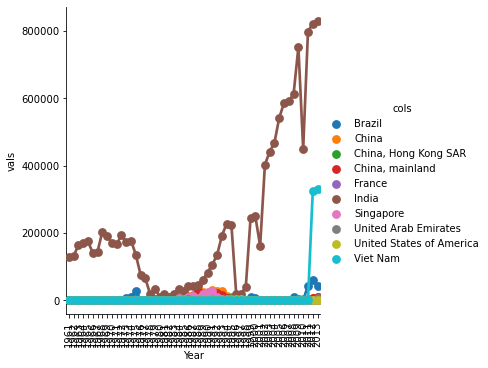

In [17]:
%matplotlib inline
plotting = data_final.melt('Year', var_name='cols',  value_name='vals')
plt.figure(figsize=(16, 6))
ax= sns.factorplot(x="Year", y="vals", hue='cols', data=plotting)
ax.set_xticklabels(rotation=90)

# Getting trends for your choice of countries and items

Select the country: India
Export trends for India


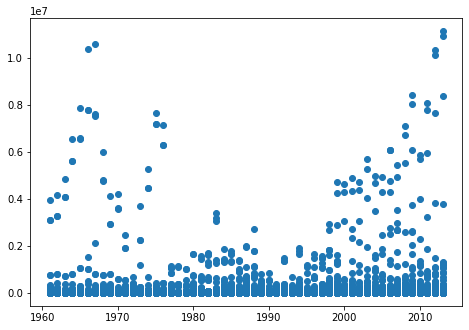

In [18]:
x=input('Select the country: ')
df_plot = df.loc[(df['Area']==x)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot.Year,df_plot['Import Quantity(tonnes)'])
print('Export trends for',x)

Select the item: Cashew nuts, with shell


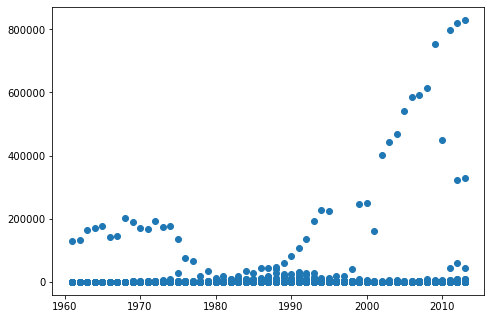

In [19]:
x=input('Select the item: ')
df_plot = df.loc[(df['Item']==x)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot.Year,df_plot['Import Quantity(tonnes)'])

Select the country: India
Select the item: Cashew nuts, with shell


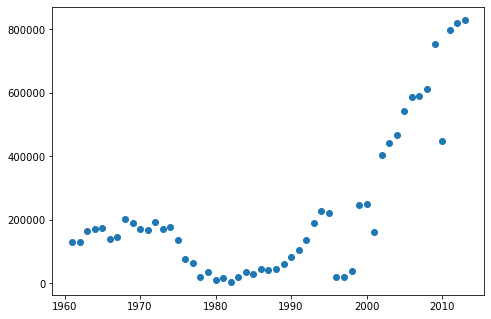

In [20]:
y=input('Select the country: ')
x=input('Select the item: ')
df_plot = df.loc[(df['Item']==x) & (df['Area']==y) ]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot.Year,df_plot['Import Quantity(tonnes)'])

# Linear Regression

In [21]:
r_net_t=0
r_net=0
for col in cols:
    X=data_final[['Year']]
    y=data_final[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    y_pred=lm.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    #print(r2_score(y_test, y_pred))
    
print('Average train:', r_net_t/10)    
print('Average test:', r_net/10)

Average train: 0.15538523977540625
Average test: 0.125486067044236


In [22]:
for col in cols:
    lm = LinearRegression()
    X = data_final[['Year']]
    Y = data_final[[col]]
    lm.fit(X, Y)
    pred1 = lm.predict(pred_indx)
    #print(pred1)
    pred = pred1[0: 13]
    preds[col] = pred
preds

Area,Brazil,China,"China, Hong Kong SAR","China, mainland",France,India,Singapore,United Arab Emirates,United States of America,Viet Nam
2014,12138.153120,7928.822206,2658.165457,5223.319303,1252.897678,489929.190856,3339.951379,1645.526125,1314.939768,48574.005806
2015,12428.935172,8005.545880,2652.901145,5304.913240,1285.438961,499714.532656,3365.674246,1688.379294,1337.126915,49916.766328
2016,12719.717223,8082.269553,2647.636833,5386.507176,1317.980245,509499.874456,3391.397113,1731.232463,1359.314062,51259.526851
2017,13010.499274,8158.993227,2642.372521,5468.101113,1350.521529,519285.216255,3417.119981,1774.085631,1381.501209,52602.287373
2018,13301.281326,8235.716900,2637.108208,5549.695049,1383.062812,529070.558055,3442.842848,1816.938800,1403.688357,53945.047896
2019,13592.063377,8312.440574,2631.843896,5631.288986,1415.604096,538855.899855,3468.565715,1859.791969,1425.875504,55287.808418
2020,13882.845428,8389.164248,2626.579584,5712.882922,1448.145380,548641.241655,3494.288582,1902.645138,1448.062651,56630.568940


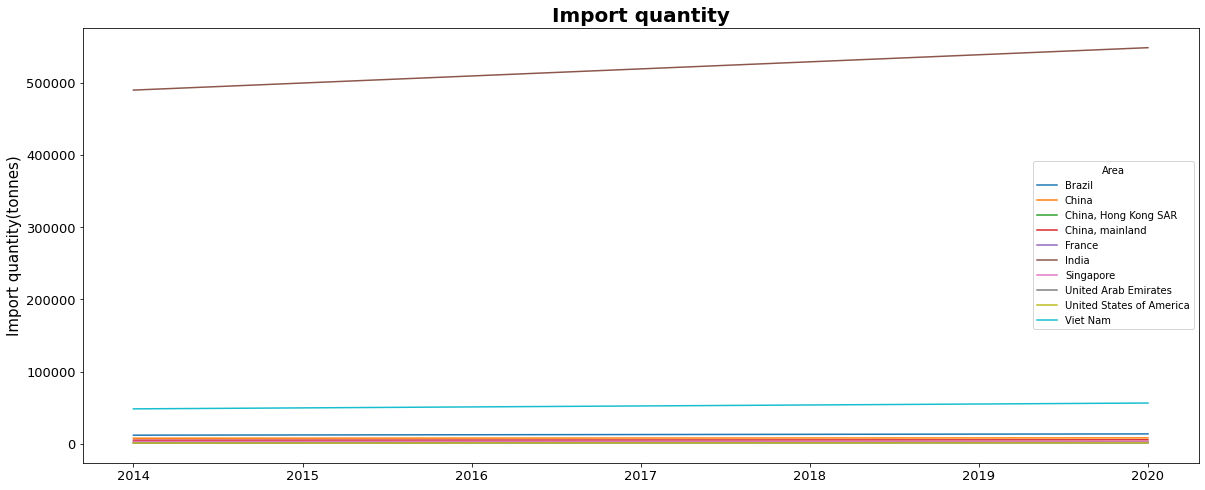

In [23]:
ax = preds.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Import quantity', fontsize=20, fontweight='bold')
ax.set_ylabel('Import quantity(tonnes)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Polynomial Regression

Training: [0.36506721012327964, 0.42906914144544733, 0.42943023309137507, 0.4297992190298266, 0.43017616048160096, 0.4305611149416926, 0.4309541367203594, 0.43135527699096887, 0.43176458371647036, 0.4321821016416747, 0.43260787224284664, 0.4330419337556969, 0.4334843211121668]
Test: [0.4370264989288475, 0.4767650636173559, 0.4763266953952755, 0.47589010603533977, 0.4754609113840636, 0.4750394209056986, 0.474625939944028, 0.474220767804474, 0.4738241977924889, 0.4734365170686524, 0.47305800659861247, 0.47268894107529935, 0.4723295888475345]


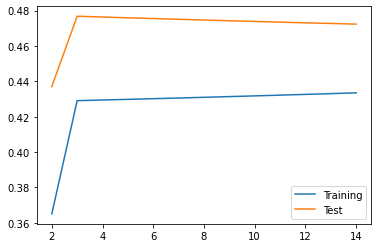

In [24]:
#Polynomial Regression
avg=[]
avg_t=[]
num=[]
for i in range(2,15):
    num.append(i)
    r_net=0
    r_net_t=0
    for col in cols:
        lm = LinearRegression()
        X=data_final[['Year']]
        y=data_final[[col]]
        poly_reg=PolynomialFeatures(degree=i)
        poly_X=poly_reg.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.30, random_state=42)
        lm.fit(X_train, y_train)
        y_pred_t=lm.predict(X_train)
        r_net_t+=r2_score(y_train, y_pred_t)
        y_pred=lm.predict(X_test)
        r_net+=r2_score(y_test, y_pred)
        #print(r2_score(y_test, y_pred))
    #print('Average:', r_net/10)
    avg.append(r_net/10)
    avg_t.append(r_net_t/10)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()

In [25]:
for col in cols:
    lm = LinearRegression()
    X = data_final[['Year']]
    poly_reg=PolynomialFeatures(degree=3)
    poly_X=poly_reg.fit_transform(X)
    Y = data_final[[col]]
    lm.fit(poly_X, Y)
    pred1 = lm.predict(poly_reg.fit_transform(pred_indx))
    pred = pred1[0: 13]
    preds[col] = pred
preds

Area,Brazil,China,"China, Hong Kong SAR","China, mainland",France,India,Singapore,United Arab Emirates,United States of America,Viet Nam
2014,40285.186794,-4631.160774,-3555.328843,-1009.379099,2277.012364,9.773105e+05,-5166.211746,4377.236498,1046.338877,183029.175888
2015,45551.507679,-6142.014192,-4257.877932,-1801.206677,2446.972962,1.056033e+06,-6326.153682,4876.429472,1028.559629,207799.002274
2016,51200.360165,-7731.544981,-4986.535169,-2644.528462,2624.508252,1.138876e+06,-7555.450204,5408.886731,1008.222896,234346.601791
2017,57243.744305,-9400.999996,-5741.345338,-3540.519051,2809.771665,1.225933e+06,-8855.663174,5975.600534,985.262956,262727.085678
2018,63693.660191,-11151.626092,-6522.353220,-4490.353040,3002.916630,1.317303e+06,-10228.354465,6577.563139,959.614085,292995.565445
2019,70562.107922,-12984.670120,-7329.603598,-5495.205025,3204.096576,1.413080e+06,-11675.085938,7215.766809,931.210559,325207.152451
2020,77861.087589,-14901.378938,-8163.141252,-6556.249603,3413.464933,1.513360e+06,-13197.419461,7891.203799,899.986656,359416.958145


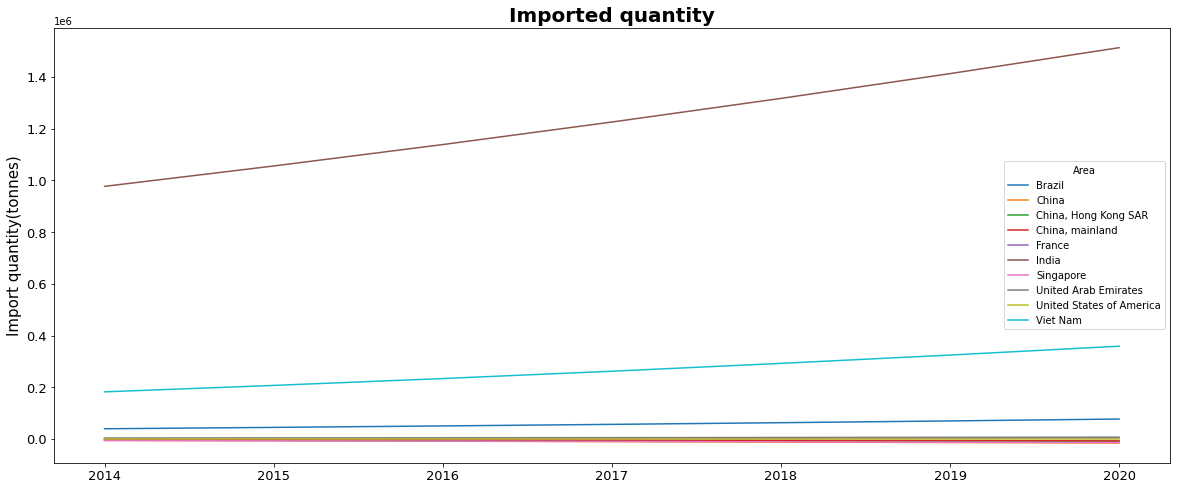

In [26]:
ax = preds.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Imported quantity', fontsize=20, fontweight='bold')
ax.set_ylabel('Import quantity(tonnes)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Ridge Regression

In [27]:
total=0
for col in cols:
    ridge = Ridge()
    parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
    ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
    X = data_final[['Year']]
    Y = data_final[[col]]
    ridge_regressor.fit(X,Y)
    print(ridge_regressor.best_params_)
    print(ridge_regressor.best_score_)

{'alpha': 20}
-182051439.0838871
{'alpha': 20}
-146246165.88159198
{'alpha': 20}
-32005412.761112016
{'alpha': 20}
-51553354.36702889
{'alpha': 20}
-829266.9655591106
{'alpha': 20}
-99189652508.18895
{'alpha': 20}
-55817502.80036809
{'alpha': 20}
-2295276.863352744
{'alpha': 20}
-565957.8845305633
{'alpha': 20}
-4983660541.830601


In [28]:
r_net=0
r_net_t=0
for col in cols:
    X=data_final[['Year']]
    y=data_final[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    y_pred_t=ridge.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    y_pred=ridge.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    #print(r2_score(y_test, y_pred))
print('Training:',r_net_t/10)
print('Test:', r_net/10)

Training: 0.1553852373561341
Test: 0.12548882841525125


In [29]:
for col in cols:
    ridge = Ridge()
    X = data_final[['Year']]
    Y = data_final[[col]]
    ridge.fit(X,Y)
    pred1 = ridge.predict(pred_indx)
    pred = pred1[0: 13]
    preds[col] = pred
    #MSEs=cross_val_score(lm,X,Y,scoring='neg_mean_squared_error',cv=5)
    #mean_MSE += np.mean(MSEs)
#print(mean_MSE)
preds

Area,Brazil,China,"China, Hong Kong SAR","China, mainland",France,India,Singapore,United Arab Emirates,United States of America,Viet Nam
2014,12137.520119,7928.655187,2658.176917,5223.141682,1252.826839,489907.889217,3339.895383,1645.432838,1314.891469,48571.082760
2015,12428.278726,8005.372675,2652.913029,5304.729040,1285.365499,499692.442067,3365.616176,1688.282552,1337.076827,49913.735022
2016,12719.037333,8082.090162,2647.649141,5386.316398,1317.904159,509476.994918,3391.336970,1731.132266,1359.262186,51256.387283
2017,13009.795940,8158.807650,2642.385254,5467.903756,1350.442819,519261.547768,3417.057763,1773.981979,1381.447544,52599.039545
2018,13300.554546,8235.525138,2637.121366,5549.491114,1382.981479,529046.100618,3442.778556,1816.831693,1403.632902,53941.691806
2019,13591.313153,8312.242625,2631.857478,5631.078472,1415.520139,538830.653468,3468.499350,1859.681407,1425.818261,55284.344068
2020,13882.071760,8388.960113,2626.593590,5712.665829,1448.058799,548615.206318,3494.220143,1902.531121,1448.003619,56626.996329


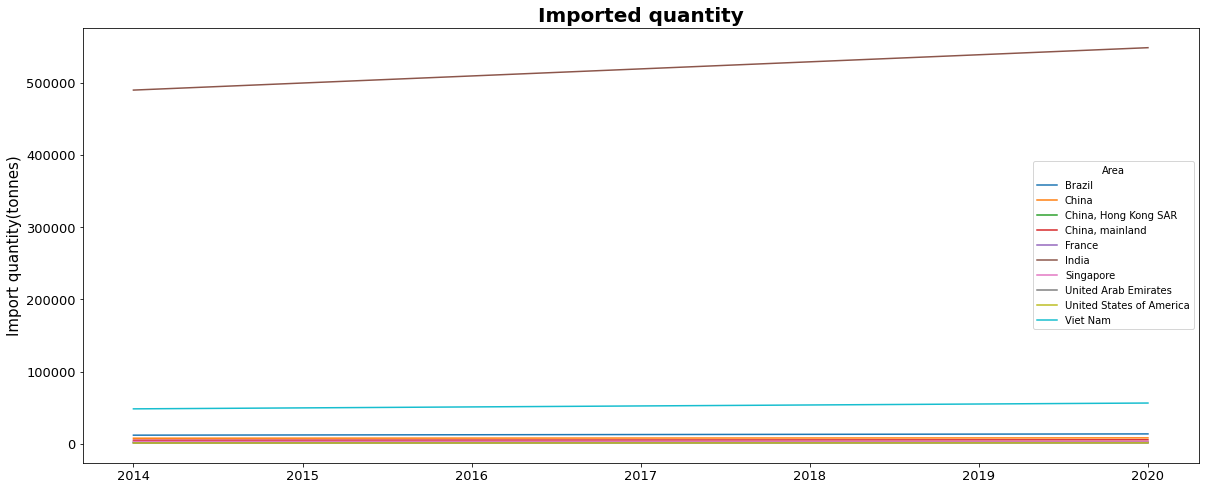

In [30]:
ax = preds.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Imported quantity', fontsize=20, fontweight='bold')
ax.set_ylabel('Import quantity(tonnes)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Predicting exports for per item and country

In [62]:
df = pd.read_csv('current_FAO/raw_files/Trade_Crops_Livestock_E_All_Data_(Normalized).csv', encoding = 'ISO-8859-1')
print(df.shape)
df

(14566119, 11)


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14566114,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2009,2009,1000 US$,26569.0,A
14566115,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2010,2010,1000 US$,27129.0,A
14566116,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2011,2011,1000 US$,27395.0,A
14566117,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2012,2012,1000 US$,42666.0,A


In [63]:
df.drop(columns = ['Element Code', 'Year Code', 'Flag','Unit'], axis = 1, inplace = True)
df=df.loc[df['Element']=='Import Quantity']
df.rename(columns = {'Value':'Import Quantity(tonnes)'}, inplace = True)
df.drop(columns = ['Element'], axis = 1, inplace = True)
df

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Area Code,Area,Item Code,Item,Year,Import Quantity(tonnes)
212,2,Afghanistan,515,Apples,1961,0.0
213,2,Afghanistan,515,Apples,1962,0.0
214,2,Afghanistan,515,Apples,1963,0.0
215,2,Afghanistan,515,Apples,1964,0.0
216,2,Afghanistan,515,Apples,1965,0.0
...,...,...,...,...,...,...
14565955,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2009,270195.0
14565956,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2010,290974.0
14565957,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2011,316618.0
14565958,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2012,349951.0


In [64]:
drop_countries = ['USSR','European Union (exc intra-trade)', 'World', 'Saint Kitts and Nevis',
                  'Saint Lucia', 'Saint Pierre and Miquelon', 'Netherlands Antilles (former)',
                  'Saint Vincent and the Grenadines', 'Sudan (former)', 
                  'The former Yugoslav Republic of Macedonia', 'Serbia and Montenegro',
                  'Sao Tome and Principe', 'Seychelles', 'Central Asia',
                  'Belgium-Luxembourg', 'Netherlands Antilles (former)', 'EU(12)ex.int', 'EU(15)ex.int',
                  'EU(25)ex.int', 'EU(27)ex.int', 'European Union (exc intra-trade)', 'World',
                  'Africa', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
                  'Southern Africa', 'Western Africa', 'Americas', 'Northern America',
                  'Central America', 'Caribbean', 'South America', 'Asia', 'Central Asira',
                  'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                  'Europe', 'Eastern Europe', 'Northern Europe', 'Southern Europe',
                  'Western Europe', 'Oceania', 'Australia & New Zealand', 'Melanesia',
                  'Micronesia', 'Polynesia', 'European Union', 'Least Developed Countries',
                  'Land Locked Developing Countries', 'Small Island Developing States',
                  'Low Income Food Deficit Countries','Net Food Importing Developing Countries']
for x in drop_countries:
    df.drop(df[df['Area'] == x].index, axis = 0, inplace = True)
print(df.shape)

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(3014025, 6)


In [65]:
df_exchange = pd.read_csv('current_FAO/raw_files/Exchange_rate_E_All_Data_(Normalized).csv', encoding = 'ISO-8859-1')
print(df_exchange.shape)
df_exchange

(9515, 11)


,Area Code,Area,Item Code,Item,ISO Currency Code,Currency,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1970,1970,NaN,0.045,XAM
1,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1971,1971,NaN,0.045,XAM
2,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1972,1972,NaN,0.045,XAM
3,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1973,1973,NaN,0.045,XAM
4,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1974,1974,NaN,0.045,XAM
...,...,...,...,...,...,...,...,...,...,...,...
9510,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2011,2011,NaN,1.000,XAM
9511,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2012,2012,NaN,1.000,XAM
9512,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2013,2013,NaN,1.000,XAM
9513,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2014,2014,NaN,1.000,XAM


In [66]:
df_exchange.info()
df_exchange.Unit.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Code          9515 non-null   int64  
 1   Area               9515 non-null   object 
 2   Item Code          9515 non-null   int64  
 3   Item               9515 non-null   object 
 4   ISO Currency Code  9515 non-null   object 
 5   Currency           9515 non-null   object 
 6   Year Code          9515 non-null   int64  
 7   Year               9515 non-null   int64  
 8   Unit               0 non-null      float64
 9   Value              9515 non-null   float64
 10  Flag               9515 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 817.8+ KB


array([nan])

In [67]:
df_exchange.drop(columns = ['Item Code', 'Item', 'ISO Currency Code', 'Year Code','Unit', 'Flag','Currency'], axis = 1, inplace = True)
df_exchange.rename(columns = {'Value':'Exchange rate'}, inplace = True)
df_exchange

,Area Code,Area,Year,Exchange rate
0,2,Afghanistan,1970,0.045
1,2,Afghanistan,1971,0.045
2,2,Afghanistan,1972,0.045
3,2,Afghanistan,1973,0.045
4,2,Afghanistan,1974,0.045
...,...,...,...,...
9510,181,Zimbabwe,2011,1.000
9511,181,Zimbabwe,2012,1.000
9512,181,Zimbabwe,2013,1.000
9513,181,Zimbabwe,2014,1.000


In [68]:
df = pd.merge(df, df_exchange, on = ['Area', 'Year','Area Code'])
df

,Area Code,Area,Item Code,Item,Year,Import Quantity(tonnes),Exchange rate
0,2,Afghanistan,515,Apples,1970,0.0,0.045
1,2,Afghanistan,486,Bananas,1970,0.0,0.045
2,2,Afghanistan,44,Barley,1970,NaN,0.045
3,2,Afghanistan,51,Beer of barley,1970,0.0,0.045
4,2,Afghanistan,634,"Beverages, distilled alcoholic",1970,12.0,0.045
...,...,...,...,...,...,...,...
2458640,181,Zimbabwe,1896,Tobacco,2013,19482.0,1.000
2458641,181,Zimbabwe,2077,Total Meat,2013,11790.0,1.000
2458642,181,Zimbabwe,1945,"Wheat+Flour,Wheat Equivalent",2013,254647.0,1.000
2458643,181,Zimbabwe,1947,"Whey, Pres+Concen",2013,288.0,1.000


In [69]:
df_gdpus = pd.read_csv('current_FAO/raw_files/Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv',encoding = 'ISO-8859-1', usecols = ['Area', 'Item', 'Element', 'Year', 'Value'])
df_gdpus.drop(df_gdpus[df_gdpus['Item'] != 'Gross Domestic Product'].index, axis = 0, inplace = True)
df_gdpus.drop(df_gdpus[df_gdpus['Element'] != 'Annual growth US$'].index, axis = 0, inplace = True)
df_gdpus.drop(columns = ['Element', 'Item'], inplace = True)
df_gdpus.columns = ['Area', 'Year', 'GDP_Growth_US$']
df_gdpus.head()

,Area,Year,GDP_Growth_US$
274,Afghanistan,1971,4.701413
275,Afghanistan,1972,-12.863980
276,Afghanistan,1973,8.635099
277,Afghanistan,1974,24.358975
278,Afghanistan,1975,9.793815


In [70]:
df = pd.merge(df, df_gdpus, on = ['Area', 'Year'])
df.head()

,Area Code,Area,Item Code,Item,Year,Import Quantity(tonnes),Exchange rate,GDP_Growth_US$
0,2,Afghanistan,515,Apples,1971,0.0,0.045,4.701413
1,2,Afghanistan,486,Bananas,1971,0.0,0.045,4.701413
2,2,Afghanistan,44,Barley,1971,NaN,0.045,4.701413
3,2,Afghanistan,51,Beer of barley,1971,0.0,0.045,4.701413
4,2,Afghanistan,634,"Beverages, distilled alcoholic",1971,20.0,0.045,4.701413


In [71]:
df.info()
df.isnull().sum()
df.replace(np.nan, 0, inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404233 entries, 0 to 2404232
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Area Code                int64  
 1   Area                     object 
 2   Item Code                int64  
 3   Item                     object 
 4   Year                     int64  
 5   Import Quantity(tonnes)  float64
 6   Exchange rate            float64
 7   GDP_Growth_US$           float64
dtypes: float64(3), int64(3), object(2)
memory usage: 165.1+ MB


Area Code                  0
Area                       0
Item Code                  0
Item                       0
Year                       0
Import Quantity(tonnes)    0
Exchange rate              0
GDP_Growth_US$             0
dtype: int64

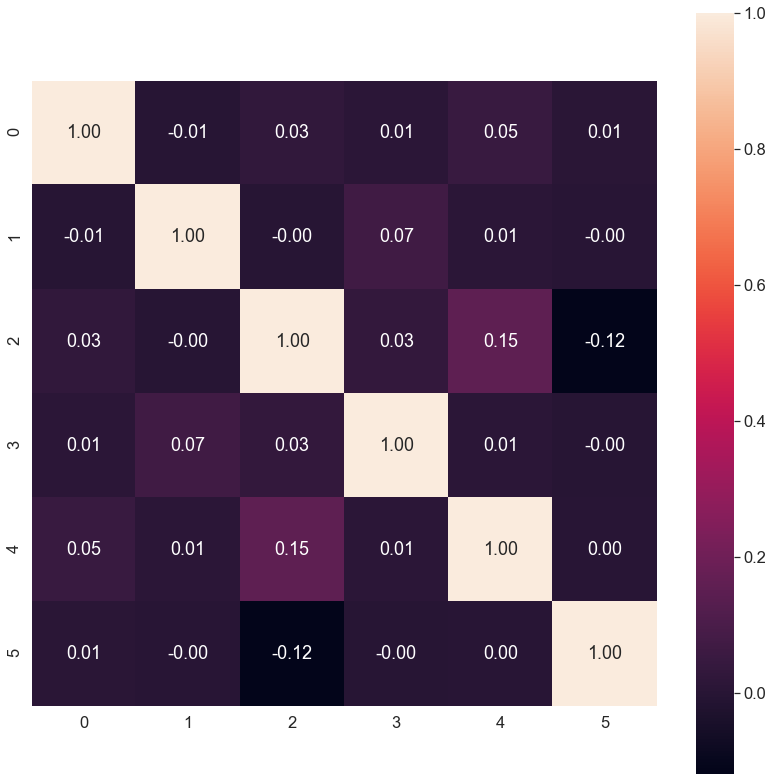

In [72]:
df_corr=df.drop(columns=['Area','Item'])
cm=np.corrcoef(df_corr.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(14,14))
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f')
plt.show()

In [73]:
df

,Area Code,Area,Item Code,Item,Year,Import Quantity(tonnes),Exchange rate,GDP_Growth_US$
0,2,Afghanistan,515,Apples,1971,0.0,0.045,4.701413
1,2,Afghanistan,486,Bananas,1971,0.0,0.045,4.701413
2,2,Afghanistan,44,Barley,1971,0.0,0.045,4.701413
3,2,Afghanistan,51,Beer of barley,1971,0.0,0.045,4.701413
4,2,Afghanistan,634,"Beverages, distilled alcoholic",1971,20.0,0.045,4.701413
...,...,...,...,...,...,...,...,...
2404228,181,Zimbabwe,1896,Tobacco,2013,19482.0,1.000,8.851771
2404229,181,Zimbabwe,2077,Total Meat,2013,11790.0,1.000,8.851771
2404230,181,Zimbabwe,1945,"Wheat+Flour,Wheat Equivalent",2013,254647.0,1.000,8.851771
2404231,181,Zimbabwe,1947,"Whey, Pres+Concen",2013,288.0,1.000,8.851771


In [74]:
df.Item.unique()

array(['Apples', 'Bananas', 'Barley', 'Beer of barley',
       'Beverages, distilled alcoholic', 'Beverages, non alcoholic',
       'Bread', 'Butter, cow milk', 'Cheese, whole cow milk',
       'Chocolate products nes', 'Cigarettes', 'Coconuts, desiccated',
       'Coffee, extracts', 'Coffee, green', 'Cotton lint', 'Cream fresh',
       'Dates', 'Eggs, hen, in shell', 'Fat, nes, prepared',
       'Fatty acids', 'Figs dried', 'Flour, cereals', 'Flour, wheat',
       'Food prep nes', 'Forage products', 'Fruit, dried nes',
       'Fruit, fresh nes', 'Fruit, prepared nes', 'Hair, fine',
       'Honey, natural', 'Infant food', 'Jute', 'Macaroni', 'Maize',
       'Margarine, short', 'Meat, cattle', 'Meat, chicken', 'Meat, goat',
       'Melons, other (inc.cantaloupes)', 'Milk, skimmed dried',
       'Milk, whole evaporated', 'Milk, whole fresh cow',
       'Oil, groundnut', 'Oil, olive, virgin', 'Oil, palm',
       'Oil, rapeseed', 'Oil, soybean', 'Oil, sunflower',
       'Oil, vegetable ori

In [77]:
x=input("Enter the item: ")
y=input("Enter the country: ")
#df_train=df.loc[(df['Item']==x) & (df['Area'==y])]
df_train = df.loc[(df['Item'] == x) & (df['Area']==y)]
df_train.drop(columns = [ 'Item Code','Item','Area','Area Code'], inplace = True)
df_train

Enter the item: Beverages
Enter the country: India


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Import Quantity(tonnes),Exchange rate,GDP_Growth_US$
1047985,1971,171.0,7.4919,7.283539
1048355,1972,161.0,7.5945,8.775710
1048725,1973,160.0,7.7420,19.253193
1049095,1974,366.0,8.1016,12.865790
1049465,1975,452.0,8.3759,4.023734
1049835,1976,326.0,8.9604,0.755515
1050205,1977,405.0,8.7386,16.033815
1050575,1978,300.0,8.1928,15.679924
1050945,1979,173.0,8.1258,10.662828
1051315,1980,170.0,7.8629,22.914151


In [78]:
X=df_train.drop(columns = ['Import Quantity(tonnes)'], axis = 1)
y=df_train['Import Quantity(tonnes)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [79]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_t=lm.predict(X_train)
linear_train=r2_score(y_train, y_pred_t)
print('Training: ',linear_train)
y_pred=lm.predict(X_test)
linear_test = r2_score(y_test, y_pred)
print('Test: ',r2_score(y_test, y_pred))

Training:  0.5797284540030261
Test:  0.5691978459145408


# Polynomial Regression

Training: [0.9867646680271179, 0.9981412210130977, 0.9999917424518399, 1.0, 1.0]
Test: [0.8337247452066353, 0.4706669914321028, -0.9448454665403552, -2.8648877148816, -2.930170033725946]


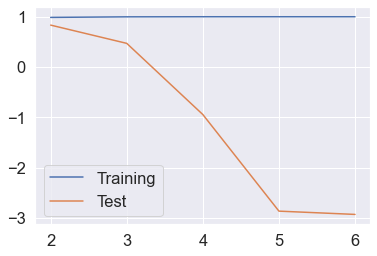

In [80]:
avg=[]
avg_t=[]
num=[]
for i in range(2,7):
    num.append(i)
    r_net=0
    r_net_t=0
    lm = LinearRegression()
    poly_reg=PolynomialFeatures(degree=i)
    poly_X=poly_reg.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3,random_state=42)
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t=r2_score(y_train, y_pred_t)
    avg_t.append(r_net_t)
    y_pred=lm.predict(X_test)
    r_net=r2_score(y_test, y_pred)
    avg.append(r_net)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()
a=max(avg)
index=avg.index(a)
poly_train = avg_t[index]
poly_test = a

# Ridge Regression

In [81]:
total=0
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
x=ridge_regressor.best_params_["alpha"]

{'alpha': 20}
-3583555152.739663


In [82]:
ridge = Ridge(alpha=x)
ridge.fit(X_train, y_train)
y_pred_t=ridge.predict(X_train)
ridge_train=r2_score(y_train, y_pred_t)

print('Train: ',ridge_train)
y_pred=ridge.predict(X_test)
ridge_test=r2_score(y_test, y_pred)
print('Test: ',ridge_test)

Train:  0.9951977113533744
Test:  0.6123182446023568


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


# Lasso Regression

In [83]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
y=lasso_regressor.best_params_['alpha']

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6555965308.770621, tolerance: 6924756.613611765
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14834764801.230701, tolerance: 6945033.450238236
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12032523455.773493, tolerance: 6978547.476638236
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:4

{'alpha': 20}
-3827736068.1099486


In [84]:
lasso = Lasso(alpha = y, max_iter = 10000000)
lasso.fit(X_train, y_train)
y_pred_t=lasso.predict(X_train)
lasso_train=r2_score(y_train, y_pred_t)
print('Train: ',lasso_train)
y_pred=lasso.predict(X_test)
lasso_test=r2_score(y_test, y_pred)
print('Test: ',lasso_test)

Train:  0.9998137694675288
Test:  -11.941393302239295


# Comparing the models

In [85]:
train_error=[linear_train,poly_train,ridge_train,lasso_train]
test_error=[linear_test,poly_test,ridge_test,lasso_test]

col={'Train score(r2)':train_error,'Test score(r2)':test_error}
models=['Linear Regression','Polynomial','Ridge Regression','Lasso Regression']
df=pd.DataFrame(data=col,index=models)
df

,Train score(r2),Test score(r2)
Linear Regression,0.579728,0.569198
Polynomial,0.986765,0.833725
Ridge Regression,0.995198,0.612318
Lasso Regression,0.999814,-11.941393


(0.0, 1.0)

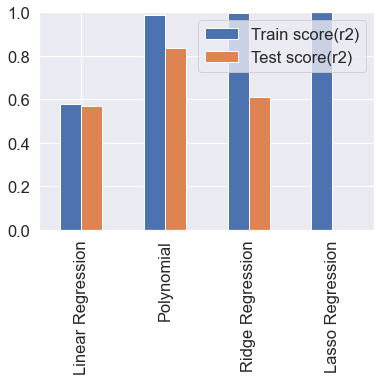

In [86]:
df.plot(kind='bar')
axes = plt.gca()
axes.set_ylim([0,1])

In [93]:
X_pred=pd.DataFrame({
    "Year":2019,
    "Exchange rate":75.75,
    "GDP_Growth_US$":4.8
}, index=[0])
X_pred
y_future=pd.DataFrame()

In [94]:
model_index = test_error.index(max(test_error))
print(model_index)

1


In [95]:
if (model_index == 0):
    lm = LinearRegression()
    lm.fit(X, y)
    y_future=lm.predict(X_pred)
    print(y_future)
elif (model_index == 1):
    lm = LinearRegression()
    poly_reg = PolynomialFeatures(degree = index + 2)
    poly_X = poly_reg.fit_transform(X)
    lm.fit(X, y)
    y_future=lm.predict(X_pred)
    print(y_future)
elif(model_index == 2):
    ridge = Ridge(alpha=x)
    ridge.fit(X, y)
    y_future=ridge.predict(X_pred)
    print(y_future)
else:
    lasso = Lasso(alpha=y)
    lasso.fit(X,y)
    y_future=lasso.predict(X_pred)
    print(y_future)

[82120.03464391]
